In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, confusion_matrix

Refer Telecom Churn Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using a suitable regression algorithm to find whether the customer will churn or not(Y/N).

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',header=0)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Total number of records in training dataset: (7043, 21)

In [4]:
df = df.dropna()
print(df.shape)
print(list(df.columns))

(7043, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Inference:

Senior citizen is actually categorical hence the 25%-50%-75% distribution is not proper

We can also conclude that 75% of people have tenure.

Average Monthly charges are USD 64.76 whereas 25% of customers pay more than USD 89.85 per month

In [9]:
df.isnull().sum ()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Target:

Churn — Whether the customer churned or not (Yes, No)
Numeric Features:

Tenure — Number of months the customer has been with the company
MonthlyCharges — The monthly amount charged to the customer
TotalCharges — The total amount charged to the customer
Categorical Features:

CustomerID
Gender — M/F
SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
Partner — Whether customer has a partner or not (Yes, No)
Dependents — Whether customer has dependents or not (Yes, No)
PhoneService — Whether the customer has a phone service or not (Yes, No)
MulitpleLines — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
InternetService — Customer’s internet service type (DSL, Fiber Optic, None)
OnlineSecurity — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
OnlineBackup — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
DeviceProtection — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
TechSupport — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
StreamingTV — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)
PaymentMethod — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [12]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

#Total Charges will be related to Monthly Charges.
#We will impute Total charges multiplied by median of the ratio of Total charges to monthly charges

In [13]:
value = (df['TotalCharges']/df['MonthlyCharges']).median()*df['MonthlyCharges']

In [14]:
df['TotalCharges'] = value.where(df['TotalCharges'] == np.nan, other =df['TotalCharges'])

In [15]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

# EXploratory Data Analytics
Univariate Analysis 

Churn (Target Variable)

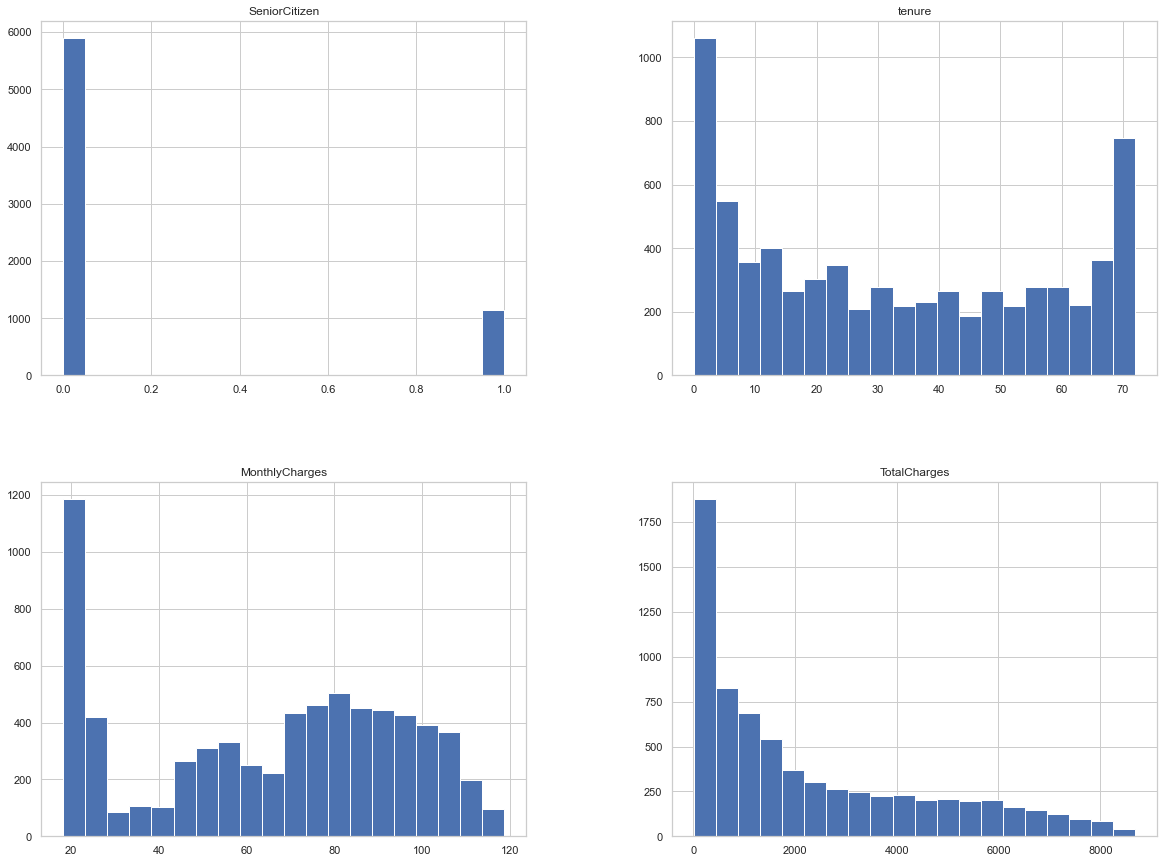

In [16]:
df.hist(bins=20, figsize=(20,15))
plt.show()

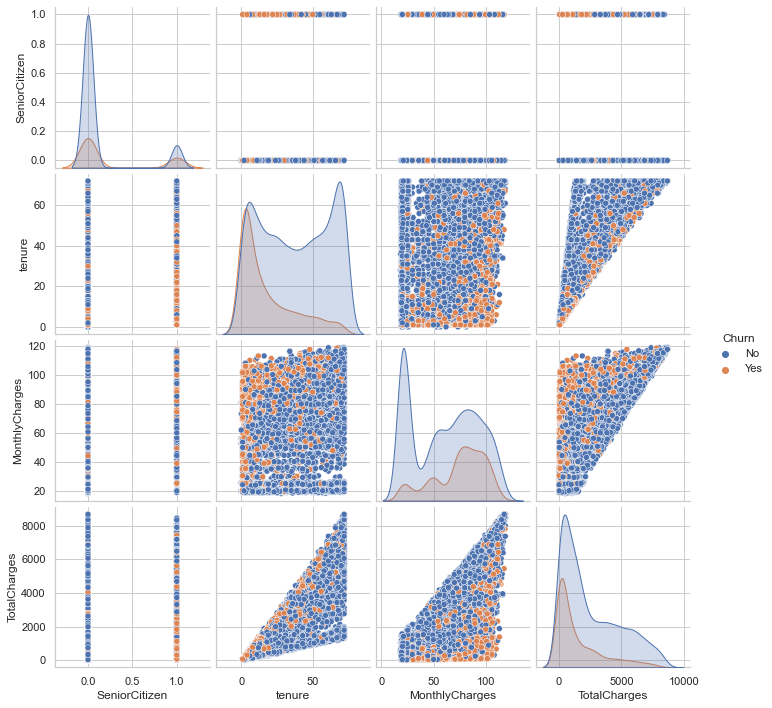

In [17]:
sns.pairplot(df, hue='Churn')
plt.show()

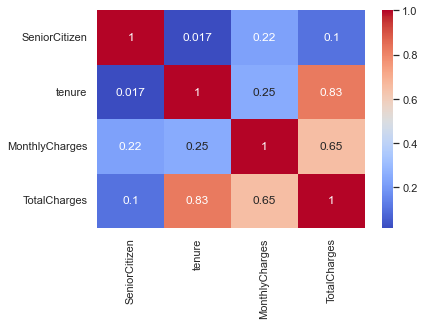

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
df.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

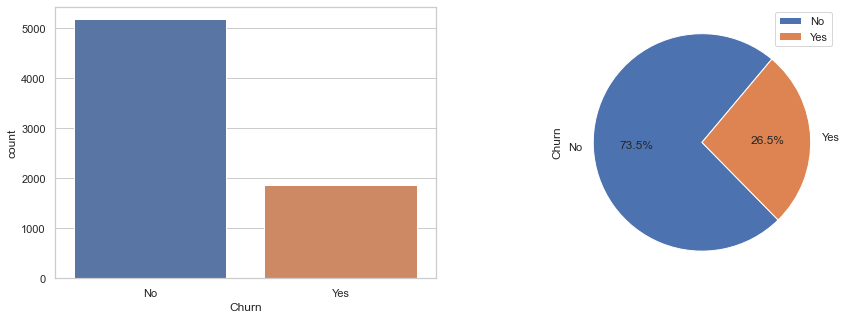

In [20]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(df['Churn'], ax = axs[0])

pie_churn = pd.DataFrame(df['Churn'].value_counts())
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50, ax = axs[1])
plt.gca().set_aspect('equal')

plt.show()

From data we have 27 % of customers switched to another firm.

### Senior Citizen vs churn

In [21]:
# table = df.groupby([column])['Churn'].value_counts().unstack().divide(df.groupby([column])['Churn'].value_counts().unstack().sum(axis=1),axis=0)*100
#     table.plot(kind="bar", stacked=True, title=column + ' vs churn',ylabel="Percent churn")
# return table

# Tenure
The time for which a customer has been using the service.

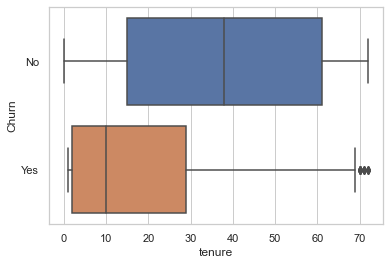

In [22]:
sns.boxplot(x = 'tenure', y = 'Churn', data = df)
plt.show()

Customer with more tenure tends to churn less.

# Phone Service
Whether a customer has a landline phone service along with the internet service.

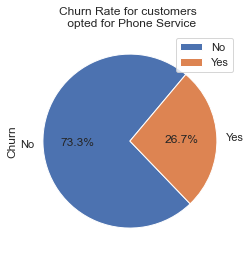

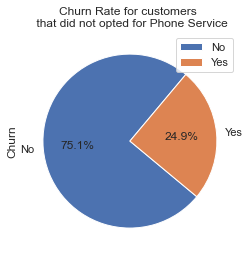

In [23]:
pie_PhoneService_Yes = pd.DataFrame(df[df['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%',startangle= 50 )
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(df[df['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn Rate for customers \n that did not opted for Phone Service')
plt.gca().set_aspect('equal')

plt.show() 

Opting for phone service does not have a significant impact on churn rate.

# Contract

In [24]:
df.groupby('Contract').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Contract,,,,
Month-to-month,0.208258,18.036645,66.398490,1369.254581
One year,0.128988,42.044807,65.048608,3034.683084
Two year,0.085546,56.735103,60.770413,3728.933947


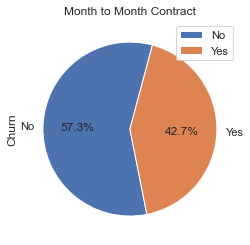

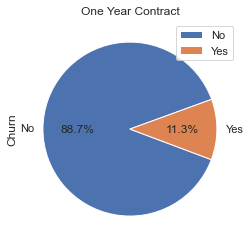

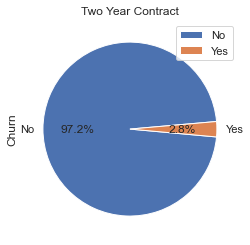

In [25]:
pie_Contract_m2m = pd.DataFrame(df[df['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(df[df['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(df[df['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

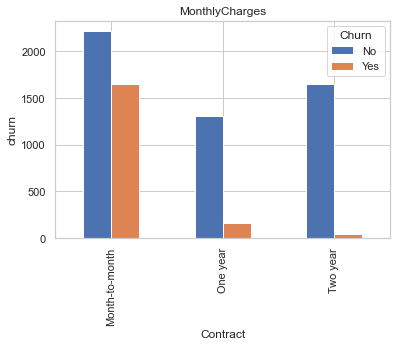

In [26]:
%matplotlib inline
pd.crosstab(df.Contract,df.Churn).plot(kind='bar')
plt.title('MonthlyCharges')
plt.xlabel('Contract')
plt.ylabel('churn')
plt.savefig('Contract')

#Customers with One Year and Two year contract tends to Churn a lot lesser than month to month contract.

# Paperless Billing

<Figure size 1080x360 with 0 Axes>

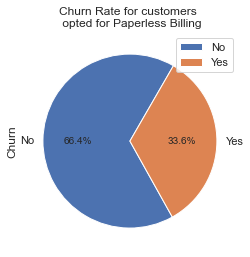

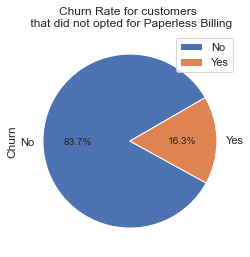

In [27]:
plt.figure(figsize=(15,5))

pie_PaperlessBilling_Yes = pd.DataFrame(df[df['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
pie_PaperlessBilling_Yes.plot.pie(subplots=True, labels = pie_PaperlessBilling_Yes.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Churn Rate for customers \n opted for Paperless Billing')
plt.gca().set_aspect('equal')


pie_PaperlessBilling_No = pd.DataFrame(df[df['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PaperlessBilling_No.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Churn Rate for customers \n that did not opted for Paperless Billing')
plt.gca().set_aspect('equal')

plt.show()

Churn Rate is higher for the customers who opted for paperless billing

# Payment Method

In [28]:
df.PaymentMethod.describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

In [29]:
df.groupby('PaymentMethod').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
PaymentMethod,,,,
Bank transfer (automatic),0.150907,43.656736,67.192649,3079.299546
Credit card (automatic),0.145204,43.269382,66.512385,3071.396022
Electronic check,0.251163,25.174630,76.255814,2090.868182
Mailed check,0.058313,21.830025,43.917060,1054.483915


<Figure size 1080x720 with 0 Axes>

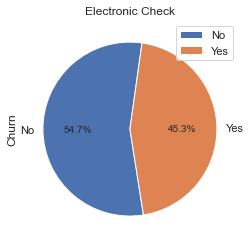

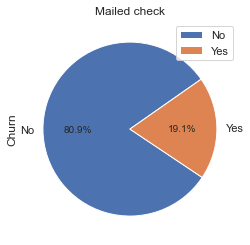

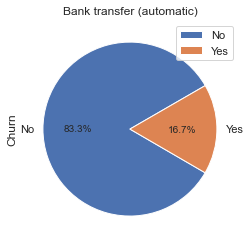

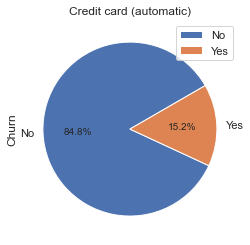

In [30]:
plt.figure(figsize=(15,10))
pie_PaymentMethod_ec = pd.DataFrame(df[df['PaymentMethod'] == "Electronic check"]['Churn'].value_counts())
pie_PaymentMethod_ec.plot.pie(subplots=True, labels = pie_PaymentMethod_ec.index.values, autopct='%1.1f%%', startangle= 82)
plt.title('Electronic Check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_mc = pd.DataFrame(df[df['PaymentMethod'] == "Mailed check"]['Churn'].value_counts())
pie_PaymentMethod_mc.plot.pie(subplots=True, labels = pie_PaymentMethod_mc.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Mailed check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_bta = pd.DataFrame(df[df['PaymentMethod'] == "Bank transfer (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_bta.plot.pie(subplots=True, labels = pie_PaymentMethod_bta.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Bank transfer (automatic)')
plt.gca().set_aspect('equal')

pie_PaymentMethod_cca = pd.DataFrame(df[df['PaymentMethod'] == "Credit card (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_cca.plot.pie(subplots=True, labels = pie_PaymentMethod_cca.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Credit card (automatic)')
plt.gca().set_aspect('equal')

plt.show()

customers with Electronic Check tends to churn more than other payment methods

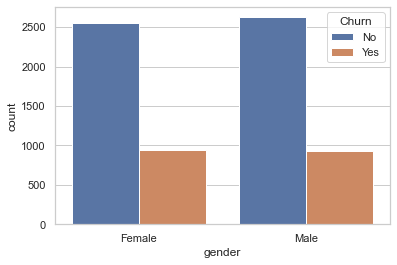

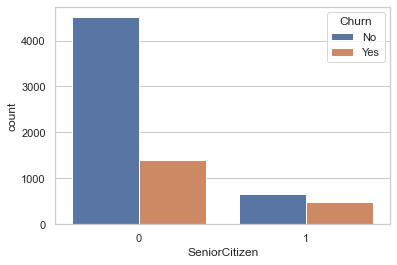

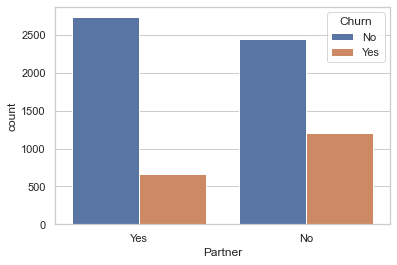

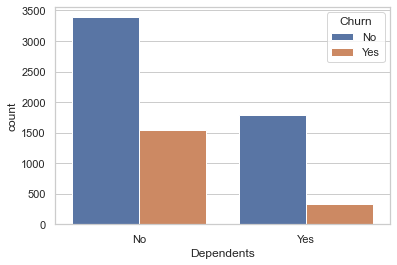

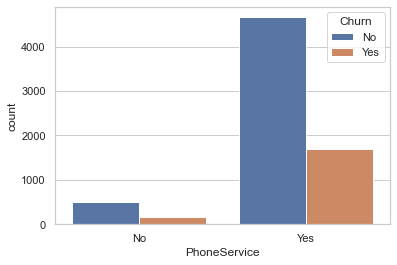

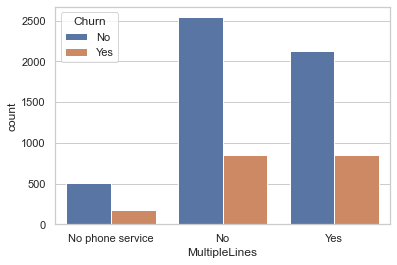

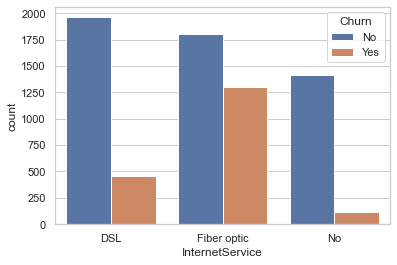

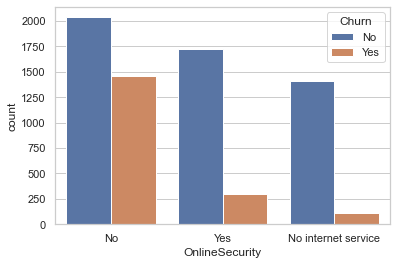

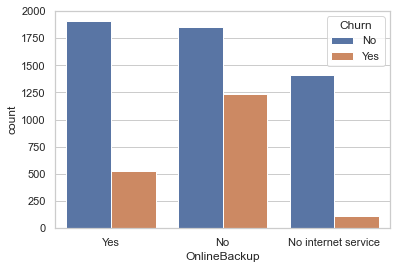

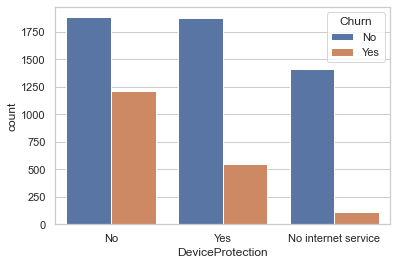

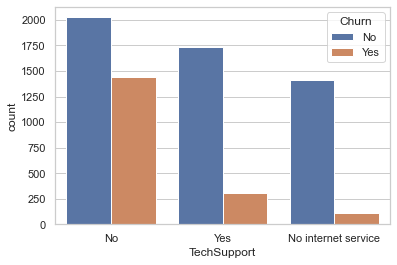

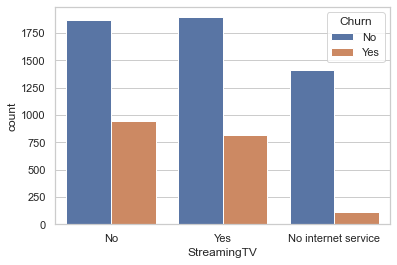

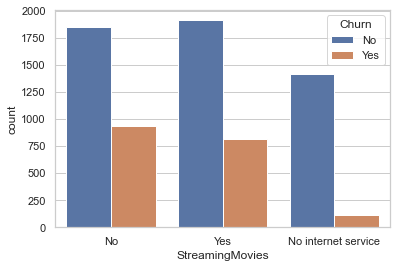

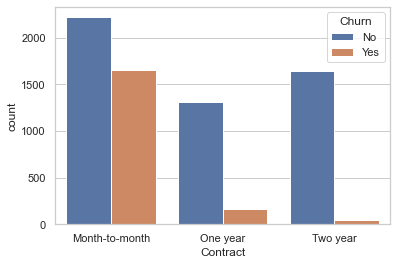

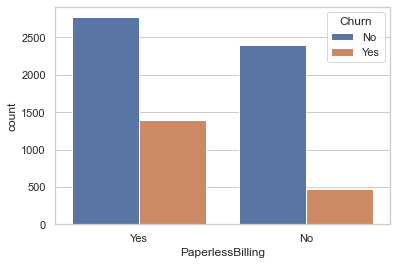

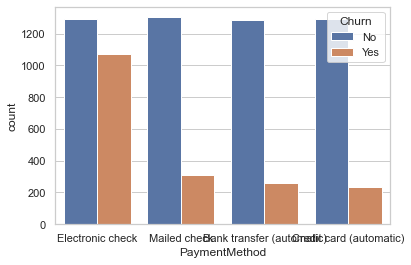

In [31]:
telco_data = df.copy()
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

#Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

#The senior citizens are more likely to churn.

#People with a partner are less likely to churn.

#Customers with no dependents tends to churn more.

#Multiple lines of internet connectivity doesn't effect churn that much.

#Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

#Customers opted for Online Security churn less than who have not opted.

#Customers opted for Online Backup churn less than who have not opted.

#Customers opted for Device Potection churn less than who have not opted.

#Customers opted for Tech Support churn less than who have not opted.

#Streaming TV doesn't make such impact on churning.

#Streaming Movies doesn't make such impact on churning.

# Model Building
Data Preparation

 Here as we know we can’t have character values for our ML model so hence we should convert it into binary numerical values i.e. Yes=1; No = 0

In [32]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [34]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1889.50,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,151.65,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,...,1990.50,0,1,0,0,0,1,1,0,0
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,...,7362.90,0,1,0,1,0,0,0,1,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,...,346.45,0,0,0,0,1,0,0,0,0
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,...,306.60,1,0,0,0,0,1,1,1,0


In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1889.50,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,151.65,1,0,0,0,1,0,0,1,0


In [36]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,sm1], axis=1)

In [37]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,...,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,...,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,...,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,...,1,0,1,0,1,0,1,0,1,0


In [38]:
# We have created dummies for the below variables, so we can drop them
telecom= df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)
telecom

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,0,...,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,1,1,0,4,1,1,74.40,306.60,1,...,1,0,1,0,1,0,1,0,1,0


In [39]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Checking for Outliers

In [40]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [41]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [42]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

`It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [43]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [44]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]
telecom

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,0,...,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,1,1,0,4,1,1,74.40,306.60,1,...,1,0,1,0,1,0,1,0,1,0


In [45]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [46]:
#Step 4: Test-Train Split
from sklearn.model_selection import train_test_split

In [47]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,1,0,1,0,1,0,1,0,1,0


In [48]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Step 5: Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,1,0,0,1,0,1,0,1,0,1


In [52]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

Step 6: Looking at Correlations

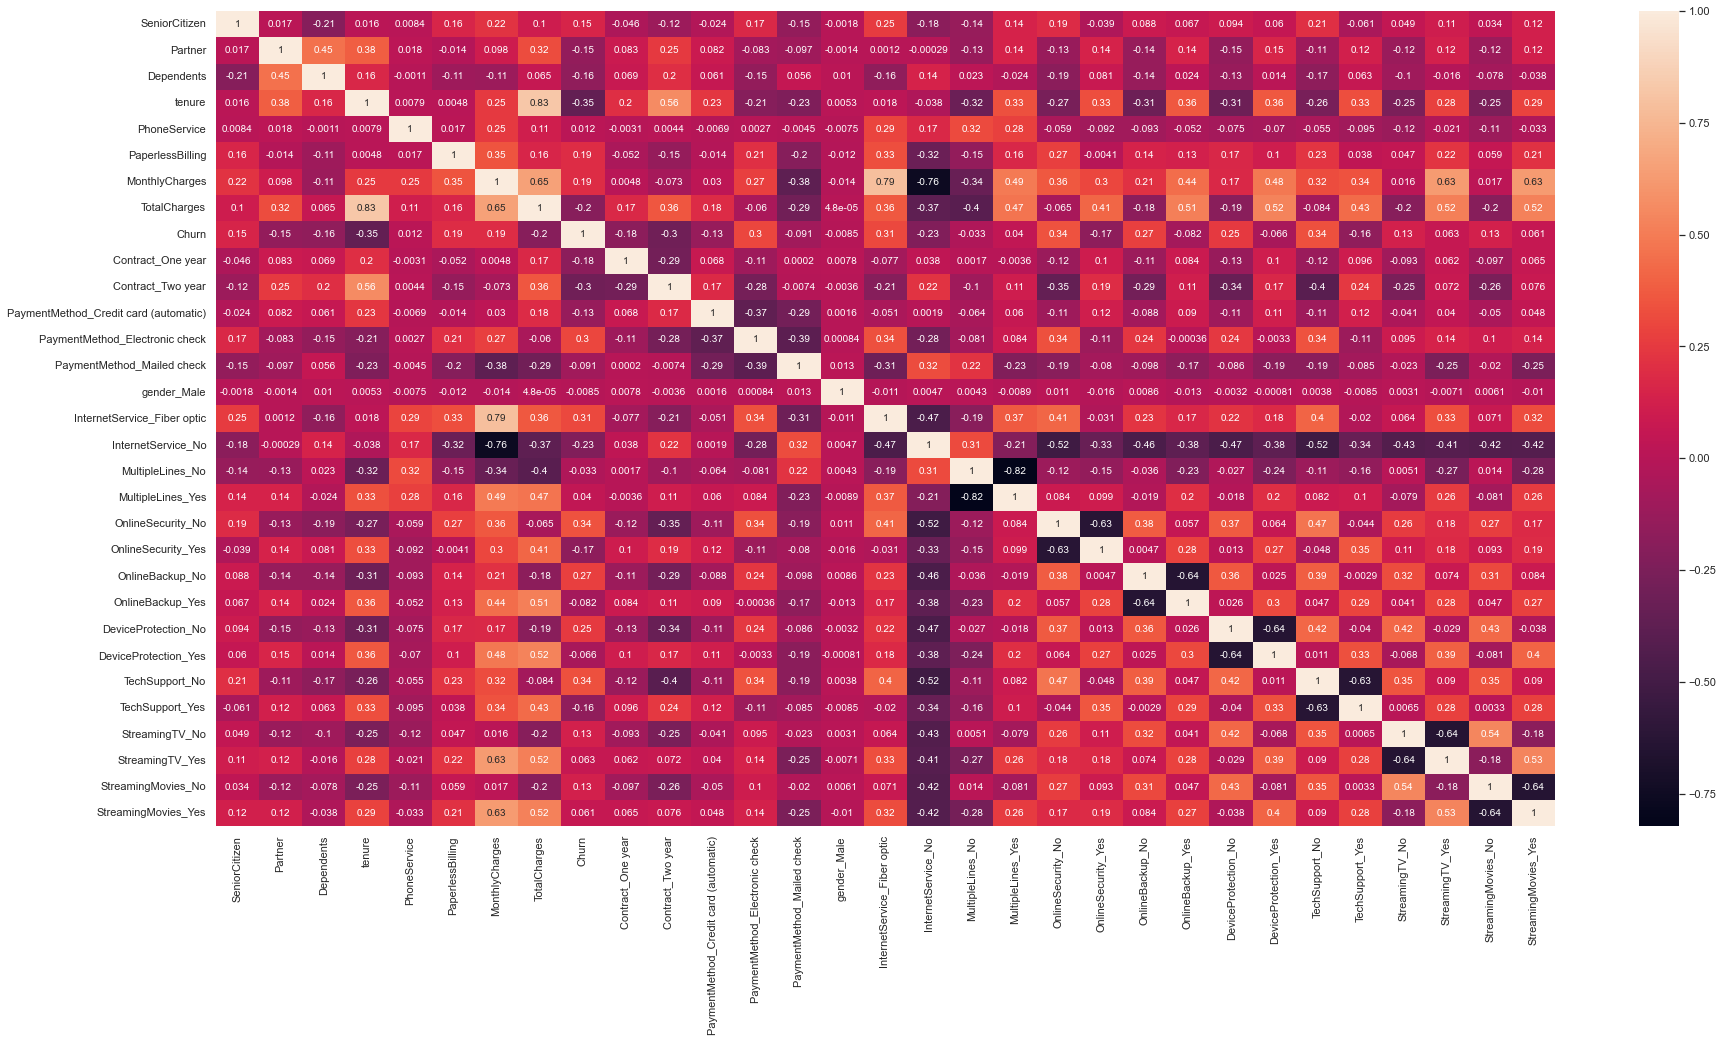

In [53]:
 # Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [54]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], 1)


In [55]:
X_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,0,0,0,24,1,1,79.85,2001.00,0,0,...,1,1,0,0,0,0,0,0,0,1
3730,0,1,0,57,1,1,104.50,5921.35,0,0,...,0,1,0,1,0,1,1,0,1,1
1761,0,0,0,58,1,1,24.45,1513.60,0,1,...,1,0,1,1,0,0,0,0,0,0
2283,0,0,0,1,1,1,71.55,71.55,0,0,...,1,1,0,0,0,0,0,0,0,0
1872,0,1,1,41,1,0,19.70,804.25,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,0,0,0,63,1,0,68.80,4111.35,1,0,...,1,0,0,1,1,1,1,1,0,0
3508,0,0,0,70,1,1,113.65,7939.25,0,1,...,0,1,0,1,1,1,1,1,1,1
6765,0,1,1,69,1,1,25.60,1673.40,0,1,...,0,0,1,1,0,0,0,0,0,0
3598,1,0,0,1,1,0,46.30,46.30,0,0,...,1,0,0,0,0,0,0,0,0,0


In [56]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,...,1,0,0,1,0,1,0,0,0,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,0,0,0,0,1,0,0,1,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,1,0,0,0,1,1,0,0,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,...,1,1,0,0,1,1,1,1,1,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,0,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,1,1,0.509448,1,1,-1.294154,-0.474260,1,0,...,0,0,1,1,0,0,0,0,0,0
3934,0,0,1,-0.919003,0,0,-0.816946,-0.829291,1,0,...,0,0,0,0,1,1,0,1,0,0
5964,0,1,1,0.672699,1,0,-0.101964,0.322781,0,0,...,0,0,0,0,1,0,1,1,0,0
6947,0,1,1,1.448144,1,1,1.204956,1.974736,1,0,...,1,1,0,1,0,1,0,0,1,1


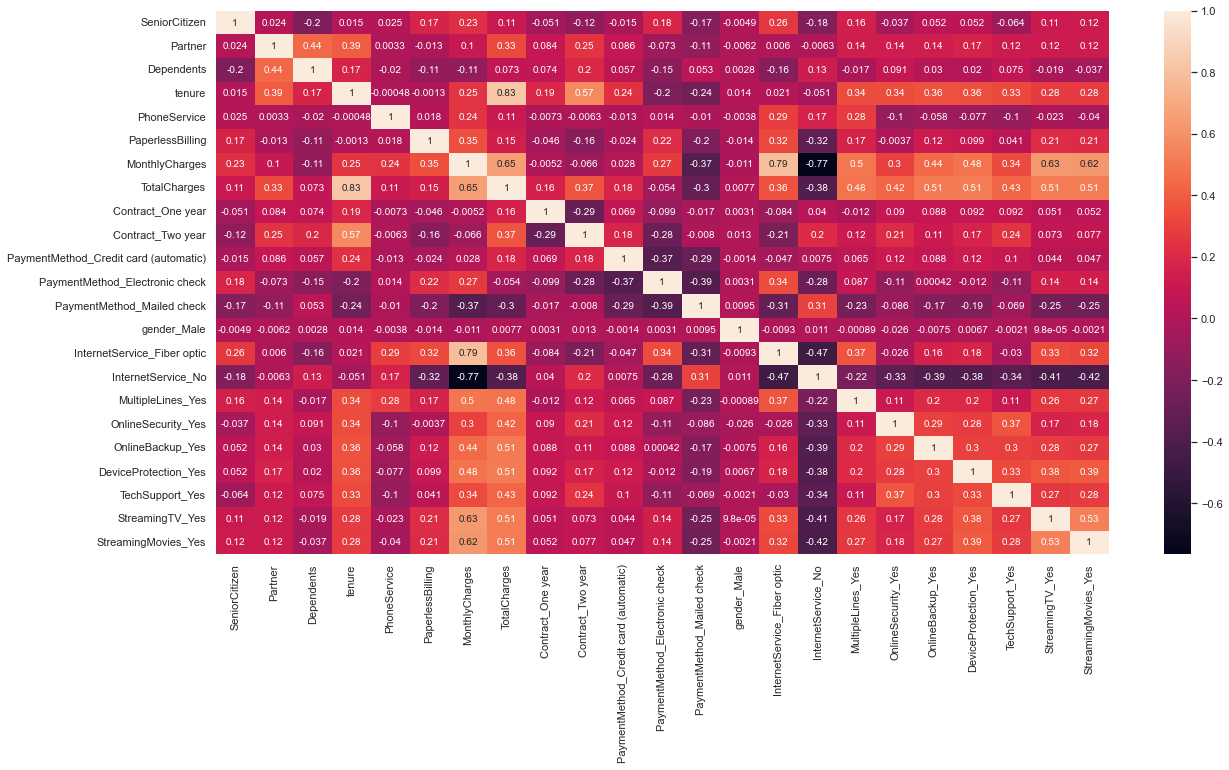

In [57]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

Electronic check mediums are the highest churners

Contract Type – Monthly customers are more likely to churn because of no contract terms, as they are free-to-go customers.

No Online security, No Tech Support category are high churners

Non-senior Citizens are high churners

In [58]:
import statsmodels.api as sm

In [59]:
# Logistic regression model Summary
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 28 Mar 2023   Deviance:                       4009.4
Time:                        14:24:17   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

# Feature Selection Using RFE

In [60]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)            # running RFE with  variables as output
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LogisticRegression())

In [62]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True,  True])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 11),
 ('Dependents', False, 10),
 ('tenure', True, 1),
 ('PhoneService', False, 7),
 ('PaperlessBilling', False, 4),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 3),
 ('PaymentMethod_Electronic check', False, 8),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 12),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 6),
 ('OnlineBackup_Yes', False, 9),
 ('DeviceProtection_Yes', False, 13),
 ('TechSupport_Yes', False, 5),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [65]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes'],
      dtype='object')

Assessing the model with StatsModels

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.3
Date:                Tue, 28 Mar 2023   Deviance:                       4062.5
Time:                        14:24:17   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2766
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4327      0.158    -15.402      0.000      -2.742      -2.123
SeniorCitizen                   0.4891      0.099      4.956      0.000       0.296       0.683
tenure                         -1.4711      0.184     -8.010      0.000      -1.831      -1.111
MonthlyCharges                 -1.1549      0.184     -6.279      0.000      -1.515      -0.794
TotalCharges                    0.6548      0.195      3.359      0.001       0.273       1.037
Contract_One year              -0.7616      0.127     -6.018      0.000      -1.010      -0.514
Contract_Two year              -1.4601      0.207     -7.044      0.000      -1.866      -1.054
InternetService_Fiber optic     1.9337      0.196      9.859      0.000       1.549       2.318
InternetService_No             -1.9165      0.211     -9.089      0.000      -2.330      -1.503
MultipleLines_Yes               0.4522      0.102      4.451      0.000       0.253       0.651
StreamingTV_Yes                 0.6792      0.111      6.119      0.000       0.462       0.897
StreamingMovies_Yes             0.5596      0.109      5.140      0.000       0.346       0.773
===============================================================================================
"""

In [67]:
X_train_sm

,const,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,1.0,0,0.019693,-0.338074,-0.276449,0,0,0,0,1,0,0
5790,1.0,0,0.305384,-0.464443,-0.112702,0,0,0,0,0,1,1
6498,1.0,0,-1.286319,0.581425,-0.974430,0,0,1,0,0,0,0
880,1.0,0,-0.919003,1.505913,-0.550676,0,0,1,0,0,1,1
2784,1.0,0,-1.163880,1.106854,-0.835971,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79,1.0,0,0.509448,-1.294154,-0.474260,1,0,0,1,1,0,0
3934,1.0,0,-0.919003,-0.816946,-0.829291,1,0,0,0,0,0,0
5964,1.0,0,0.672699,-0.101964,0.322781,0,0,0,0,0,0,0
6947,1.0,0,1.448144,1.204956,1.974736,1,0,1,0,1,1,1


In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [78]:
from sklearn import metrics

In [79]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

NameError: name 'y_train_pred_final' is not defined

#We have 3978 are correctly predicted records.

#944 record are not correctly predicated.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

In [ ]:
# Let's check the overall accuracy.
print('Accuracy:',metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print('Precision:',precision_score(y_train_pred_final.Churn,y_train_pred_final.predicted))
print('Recall:',recall_score(y_train_pred_final.Churn,y_train_pred_final.predicted))
print('F1 score:',f1_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

As accuracy of dataset is 80 % i.e Model fits the dataset very well

Here accuracy score meaning would be that the model explains 80% of the fitted data in the logestic regression model

## FOR Test

In [71]:
X_test_sm = sm.add_constant(X_test[col])
logm2 = sm.GLM(y_test,X_test_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2110
Model:                            GLM   Df Residuals:                     2098
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -908.65
Date:                Tue, 28 Mar 2023   Deviance:                       1817.3
Time:                        14:27:55   Pearson chi2:                 2.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2714
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.9472      0.431      4.515      0.000       1.102       2.793
SeniorCitizen                  -0.1070      0.149     -0.718      0.473      -0.399       0.185
tenure                         -0.0614      0.011     -5.786      0.000      -0.082      -0.041
MonthlyCharges                 -0.0521      0.009     -5.641      0.000      -0.070      -0.034
TotalCharges                    0.0003      0.000      2.864      0.004       0.000       0.001
Contract_One year              -0.7695      0.193     -3.983      0.000      -1.148      -0.391
Contract_Two year              -1.7637      0.314     -5.623      0.000      -2.379      -1.149
InternetService_Fiber optic     2.3046      0.302      7.619      0.000       1.712       2.897
InternetService_No             -1.7629      0.301     -5.866      0.000      -2.352      -1.174
MultipleLines_Yes               0.6491      0.153      4.247      0.000       0.350       0.949
StreamingTV_Yes                 0.6515      0.169      3.856      0.000       0.320       0.983
StreamingMovies_Yes             0.9712      0.174      5.589      0.000       0.631       1.312
===============================================================================================
"""

In [72]:
X_test_sm

,const,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,1.0,0,24,79.85,2001.00,0,0,1,0,0,0,1
3730,1.0,0,57,104.50,5921.35,0,0,1,0,1,1,1
1761,1.0,0,58,24.45,1513.60,0,1,0,1,1,0,0
2283,1.0,0,1,71.55,71.55,0,0,1,0,0,0,0
1872,1.0,0,41,19.70,804.25,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1.0,0,63,68.80,4111.35,1,0,0,0,1,0,0
3508,1.0,0,70,113.65,7939.25,0,1,1,0,1,1,1
6765,1.0,0,69,25.60,1673.40,0,1,0,1,1,0,0
3598,1.0,1,1,46.30,46.30,0,0,0,0,0,0,0


In [73]:
# Getting the predicted values on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

942     0.570361
3730    0.408476
1761    0.005263
2283    0.619986
1872    0.007807
1970    0.610636
2532    0.198577
1616    0.004234
2485    0.555486
5914    0.122712
dtype: float64

In [74]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.57036123, 0.40847575, 0.00526311, 0.61998559, 0.00780691,
       0.61063556, 0.19857743, 0.00423404, 0.55548622, 0.12271172])

In [75]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.570361,942
1,1,0.408476,3730
2,0,0.005263,1761
3,1,0.619986,2283
4,0,0.007807,1872


In [76]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.570361,942,1
1,1,0.408476,3730,0
2,0,0.005263,1761,0
3,1,0.619986,2283,1
4,0,0.007807,1872,0


In [80]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

[[1353  175]
 [ 263  319]]


In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test_pred_final.Churn, y_test_pred_final.predicted ))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1528
           1       0.65      0.55      0.59       582

    accuracy                           0.79      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.78      0.79      0.79      2110



In [83]:
# Let's check the overall accuracy on test data
print('Accuracy:',metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted ))
print('Precision:',precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted ))
print('Recall:',recall_score(y_test_pred_final.Churn, y_test_pred_final.predicted ))
print('F1 score:',f1_score(y_test_pred_final.Churn, y_test_pred_final.predicted ))

Accuracy: 0.7924170616113744
Precision: 0.645748987854251
Recall: 0.5481099656357389
F1 score: 0.5929368029739778
